<a href="https://colab.research.google.com/github/ehpub/KFQ_DL_2023-/blob/main/2023_kfq_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%B2%AB%EB%A7%8C%EB%82%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

## 산타는 강의

전통적인 프로그램에서 중요하게 생각하는 알고리즘 중 하나 - 동적 알고리즘

In [ ]:
def fibonacci(n):
  if n<=0:
    return 0
  if n==1 or n==2:
    return 1
  return fibonacci(n-1) + fibonacci(n-2)

In [ ]:
for i in range(1,30):
  print(fibonacci(i),end=' ')

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 

In [ ]:
import time

In [ ]:
for i in range(35,50):
  print("#",i,end=':')
  s = time.time()
  re = fibonacci(i)
  e = time.time()
  print(f"소요시간:{e-s:.4f} 결과:{re}")

# 35:소요시간:2.7797 결과:9227465
# 36:소요시간:5.9979 결과:14930352
# 37:소요시간:7.6281 결과:24157817
# 38:소요시간:13.1537 결과:39088169
# 39:소요시간:23.3415 결과:63245986
# 40:소요시간:33.7541 결과:102334155
# 41:

KeyboardInterrupt: ignored

In [ ]:
answer=[0,1,1]
def fibonacci2(n):
  if n >= len(answer):
    re = fibonacci2(n-1) + fibonacci2(n-2)
    answer.append(re)
  return answer[n]

In [ ]:
for i in range(35,50):
  print("#",i,end=':')
  s = time.time()
  re = fibonacci2(i)
  e = time.time()
  print(f"소요시간:{e-s:.4f} 결과:{re}")

# 35:소요시간:0.0000 결과:9227465
# 36:소요시간:0.0000 결과:14930352
# 37:소요시간:0.0000 결과:24157817
# 38:소요시간:0.0000 결과:39088169
# 39:소요시간:0.0000 결과:63245986
# 40:소요시간:0.0000 결과:102334155
# 41:소요시간:0.0000 결과:165580141
# 42:소요시간:0.0000 결과:267914296
# 43:소요시간:0.0000 결과:433494437
# 44:소요시간:0.0000 결과:701408733
# 45:소요시간:0.0000 결과:1134903170
# 46:소요시간:0.0000 결과:1836311903
# 47:소요시간:0.0000 결과:2971215073
# 48:소요시간:0.0000 결과:4807526976
# 49:소요시간:0.0000 결과:7778742049


## 딥러닝 - 처음이라네.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### 전처리

In [ ]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
import numpy as np

In [ ]:
np.max(x_train),np.min(x_train)

(255, 0)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
np.max(x_train),np.min(x_train)

(1.0, 0.0)

### 모델 생성

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Input(shape = (784,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 학습

In [ ]:
hist = model.fit(x_train,y_train,epochs=100,
                 batch_size=128,
                 validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 7s 16ms/step - loss: 0.3009 - accuracy: 0.9148 - val_loss: 0.1512 - val_accuracy: 0.9565
Epoch 2/100
375/375 [==============================] - 4s 12ms/step - loss: 0.1237 - accuracy: 0.9640 - val_loss: 0.1074 - val_accuracy: 0.9687
Epoch 3/100
375/375 [==============================] - 5s 12ms/step - loss: 0.0793 - accuracy: 0.9770 - val_loss: 0.0907 - val_accuracy: 0.9732
Epoch 4/100
375/375 [==============================] - 6s 15ms/step - loss: 0.0577 - accuracy: 0.9832 - val_loss: 0.0797 - val_accuracy: 0.9758
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 0.0422 - accuracy: 0.9878 - val_loss: 0.0770 - val_accuracy: 0.9747
Epoch 6/100
375/375 [==============================] - 6s 16ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.0767 - val_accuracy: 0.9775
Epoch 7/100
375/375 [==============================] - 5s 14ms/step - loss: 0.0223 - accuracy: 0.9946 - val_loss: 0.0743 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt

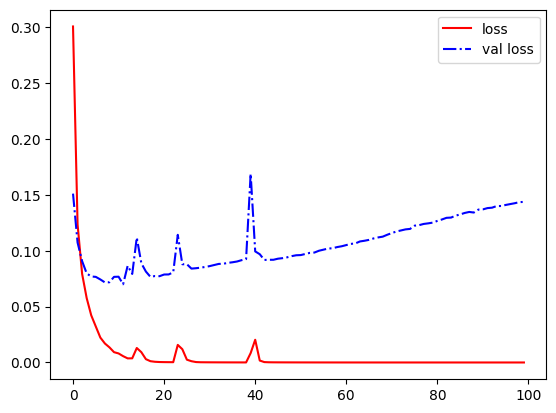

In [ ]:
plt.plot(hist.history['loss'] ,'r-',label='loss')
plt.plot(hist.history['val_loss'] ,'b-.',label='val loss')
plt.legend()
plt.show()

### 예측 및 평가

In [ ]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [ ]:
pred[0], y_test[0]

(array([8.7113500e-23, 3.9855440e-25, 1.2130761e-18, 2.0866847e-15,
        1.1517134e-37, 3.8282095e-27, 1.3483102e-35, 9.9999994e-01,
        2.2738442e-23, 4.1600258e-16], dtype=float32),
 7)

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1279 - accuracy: 0.9837


[0.1278533935546875, 0.9836999773979187]

## 데이터 표현

### 스칼라 - 텐서 0

In [ ]:
import numpy as np

In [ ]:
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### 벡터 텐서1

In [ ]:
x = np.array([1,2,3,4])
x.ndim , x.shape

(1, (4,))

### 행렬 - 텐서2

In [ ]:
x = np.array([[1,2,3],[4,5,6]])
x.ndim, x.shape

(2, (2, 3))

In [ ]:
#다차원
x = np.array([[[1,2,3],[4,5,6]],
              [[1,2,3],[4,5,6]]])
x.ndim,x.shape

(3, (2, 2, 3))

In [ ]:
x_train.ndim, x_train.shape , x_train.reshape(-1,28,28).shape

(2, (60000, 784), (60000, 28, 28))

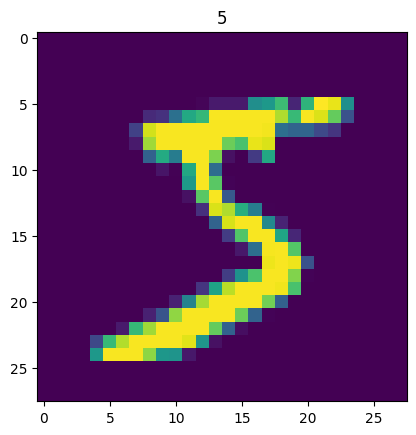

In [ ]:
img = x_train[0].reshape(28,28)
plt.imshow(img)
plt.title(str(y_train[0]))
plt.show()

In [ ]:
batch1 = x_train[:128]
batch2 = x_train[128:256]
batch1.shape, batch2.shape

((128, 784), (128, 784))

In [ ]:
batches = []
for i in range(int(len(x_train)/128)):
  batches.append(x_train[i*128:(i+1)*128])
len(batches)

468

연산

In [ ]:
def add(x2d,y2d):
  r2d = x2d.copy()
  for i in range(x2d.shape[0]):
    for j in range(x2d.shape[1]):
      r2d[i,j] = x2d[i,j] + y2d[i,j]
  return r2d

In [ ]:
x = np.random.random((3,3))
y = np.random.random((3,3))
print(x)
print(y)
add(x,y)

In [ ]:
x = np.random.random((28,28))
y = np.random.random((28,28))
x+y

In [ ]:
import time

In [ ]:
st = time.time()
for _ in range(10000):
  z = x+y
et = time.time()
print(f'{et-st:.5f}')

0.03288


In [ ]:
st = time.time()
for _ in range(10000):
  z = add(x,y)
et = time.time()
print(f'{et-st:.5f}')

6.45139


In [ ]:
def dot(x,y):
  r = np.zeros((x.shape[0],y.shape[1]))
  for i in range(x.shape[0]):
    s = 0
    for j in range(x.shape[1]):
      s += x[i,j] *y[j]
    r[i]=s
  return r

In [ ]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[1],[1],[3]])
x.shape, y.shape

((2, 3), (3, 1))

In [ ]:
dot(x,y)

(1,)
(1,)


array([[12.],
       [27.]])

### 텐서와 기울기

In [ ]:
import tensorflow as tf

In [ ]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.random.normal(shape=(6,1),mean=0,stddev=0.1)
print(x)

tf.Tensor(
[[ 0.17678384]
 [-0.08759546]
 [-0.03975897]
 [-0.04464398]
 [-0.12017976]
 [-0.20935182]], shape=(6, 1), dtype=float32)


In [ ]:
x = tf.random.uniform(shape=(6,1),minval=0,maxval=6)
print(x)

tf.Tensor(
[[2.0637023 ]
 [5.354659  ]
 [3.9308116 ]
 [0.60208654]
 [0.6399815 ]
 [1.7530096 ]], shape=(6, 1), dtype=float32)


In [ ]:
v = tf.Variable(initial_value=3)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [ ]:
v.assign(7)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=7>


In [ ]:
v.assign_add(8)
print(v)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=15>


In [ ]:
x = tf.square(v)
print(x)

tf.Tensor(225, shape=(), dtype=int32)


In [ ]:
iv = tf.Variable(initial_value=3.)
print(iv)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


In [ ]:
with tf.GradientTape() as tape:
  result = tf.square(iv)

In [ ]:
print(result)

tf.Tensor(9.0, shape=(), dtype=float32)


In [ ]:
gradient = tape.gradient(result,iv)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
time = tf.Variable(9.)
print(time)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=9.0>


In [ ]:
with tf.GradientTape() as out_tape:
  with tf.GradientTape() as in_tape:
    position = 4.9 * time**2
  speed = in_tape.gradient(position,time)
acceleration = out_tape.gradient(speed,time)

In [ ]:
print(position)

tf.Tensor(396.9, shape=(), dtype=float32)


In [ ]:
print(speed)

tf.Tensor(88.200005, shape=(), dtype=float32)


In [ ]:
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


### 텐서 플로우 내부 - 선형 분류기

In [ ]:
import numpy as np

In [ ]:
num_samples_per_class = 1000

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
negative_samples = np.random.multivariate_normal(
    mean=[0,2],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
print(negative_samples)

[[-0.28116101  2.5401263 ]
 [ 0.83750379  3.53953481]
 [ 0.18308221  1.59354496]
 ...
 [-0.276842    2.06860088]
 [ 0.91894898  0.6524838 ]
 [ 0.53161921  4.64545169]]


In [ ]:
positive_samples = np.random.multivariate_normal(
    mean=[3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
print(positive_samples)

[[ 2.47255921 -1.00602627]
 [ 3.13213871  0.99202123]
 [ 0.16654407 -1.42559999]
 ...
 [ 2.96229149 -1.36166732]
 [ 1.29242551 -0.74912657]
 [ 3.98772441  1.72503159]]


In [ ]:
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)
print(inputs)

[[-0.281161    2.5401263 ]
 [ 0.8375038   3.5395348 ]
 [ 0.18308221  1.593545  ]
 ...
 [ 2.9622915  -1.3616673 ]
 [ 1.2924255  -0.74912655]
 [ 3.9877243   1.7250316 ]]


In [ ]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.vstack((a,b))
print(c)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [ ]:
neg_targets = np.zeros((num_samples_per_class,1),dtype='float32')
pos_targets = np.ones((num_samples_per_class,1),dtype='float32')

In [ ]:
targets = np.vstack((neg_targets,pos_targets))

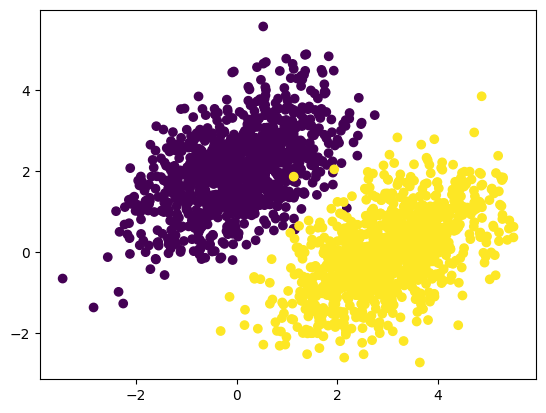

In [ ]:
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

In [ ]:
input_dim = 2
output_dim = 1

In [ ]:
print(inputs.shape)

(2000, 2)


In [ ]:
W = tf.Variable(tf.random.uniform(shape = (input_dim,output_dim)))

In [ ]:
b = tf.Variable(tf.zeros(shape=(output_dim,)))

In [ ]:
def model(inputs): #forward
  return tf.matmul(inputs,W)+b

In [ ]:
def square_loss(targets,predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
learning_rate = 0.1 #학습률

In [ ]:
def train_step(inputs,targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs) #forward
    loss = square_loss(targets, predictions) #손실계산
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b]) #편미분으로 기울기 계산
  W.assign_sub(grad_loss_wrt_W*learning_rate)
  b.assign_sub(grad_loss_wrt_b*learning_rate)
  return loss


In [ ]:
for step in range(40):
  loss = train_step(inputs,targets)
  print(f'{step}번째 손실:{loss:.4f}')

0번째 손실:0.3674
1번째 손실:0.1277
2번째 손실:0.0966
3번째 손실:0.0868
4번째 손실:0.0803
5번째 손실:0.0748
6번째 손실:0.0699
7번째 손실:0.0657
8번째 손실:0.0619
9번째 손실:0.0585
10번째 손실:0.0555
11번째 손실:0.0529
12번째 손실:0.0506
13번째 손실:0.0485
14번째 손실:0.0467
15번째 손실:0.0450
16번째 손실:0.0436
17번째 손실:0.0423
18번째 손실:0.0412
19번째 손실:0.0402
20번째 손실:0.0393
21번째 손실:0.0385
22번째 손실:0.0378
23번째 손실:0.0372
24번째 손실:0.0366
25번째 손실:0.0361
26번째 손실:0.0357
27번째 손실:0.0353
28번째 손실:0.0350
29번째 손실:0.0347
30번째 손실:0.0344
31번째 손실:0.0342
32번째 손실:0.0340
33번째 손실:0.0338
34번째 손실:0.0336
35번째 손실:0.0335
36번째 손실:0.0333
37번째 손실:0.0332
38번째 손실:0.0331
39번째 손실:0.0330


In [ ]:
predictions = model(inputs)

In [ ]:
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.08516079],
       [-0.01625505],
       [ 0.14401163],
       ...,
       [ 1.116448  ],
       [ 0.70353293],
       [ 0.8598007 ]], dtype=float32)>

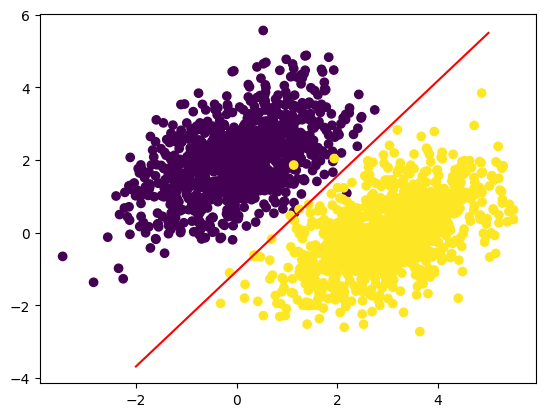

In [ ]:
x1 = np.linspace(-2,5,100)
x2 = -W[0]/W[1]*x1 + (0.5-b)/W[1]
plt.plot(x1,x2,"-r")
plt.scatter(inputs[:,0],inputs[:,1],c=targets[:,0])
plt.show()

### 내부 - Layer

In [ ]:
from tensorflow import keras
from keras import layers

In [ ]:
class SimpleDense(layers.Layer):
  def __init__(self,units,activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self,input_shape): #모델 파라미터 초기화
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim,self.units),
                             initializer='random_normal')
    self.b = self.add_weight(shape=(self.units),
                             initializer='zeros')
  def call(self,inputs): #forward
    y = tf.matmul(inputs,self.W)+self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [ ]:
my_dense = SimpleDense(units=32,activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


In [ ]:
model = keras.Sequential()
model.add(SimpleDense(32,activation='relu'))
model.add(SimpleDense(64,activation='relu'))
model.add(SimpleDense(32,activation='relu'))
model.add(SimpleDense(10,activation='softmax'))

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [ ]:
model = keras.Sequential()
model.add(SimpleDense(1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [ ]:
model = keras.Sequential()
model.add(SimpleDense(1))
mse_fun = keras.losses.MeanSquaredError()
opt_fun = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=mse_fun,optimizer=opt_fun,metrics=['accuracy'])

In [ ]:
hist = model.fit(inputs,
                 targets,
                 epochs=5,
                 batch_size=128)

Epoch 1/5
16/16 [==============================] - 3s 3ms/step - loss: 0.4548 - accuracy: 0.5000
Epoch 2/5
16/16 [==============================] - 0s 6ms/step - loss: 0.4542 - accuracy: 0.5000
Epoch 3/5
16/16 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.5000
Epoch 4/5
16/16 [==============================] - 0s 6ms/step - loss: 0.4530 - accuracy: 0.5000
Epoch 5/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4524 - accuracy: 0.5000


In [ ]:
hist.history

{'loss': [0.4547971785068512,
  0.45418938994407654,
  0.45357921719551086,
  0.45297175645828247,
  0.4523642957210541],
 'accuracy': [0.5, 0.5, 0.5, 0.5, 0.5]}

In [ ]:
ip = np.random.permutation(len(inputs))

In [ ]:
ip2 = np.random.permutation(10)
ip2

array([1, 0, 4, 6, 7, 5, 3, 2, 9, 8])

In [ ]:
s_inputs = inputs[ip]
s_targets = targets[ip]

In [ ]:
n = len(targets)

In [ ]:
n

2000

In [ ]:
train_inputs = s_inputs[:int(n*7/10)]
val_inputs = s_inputs[int(n*7/10):int(n*8/10)]
test_inputs = s_inputs[int(n*8/10):]

train_targets = s_targets[:int(n*7/10)]
val_targets = s_targets[int(n*7/10):int(n*8/10)]
test_targets = s_targets[int(n*8/10):]